In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2

(333, 500, 3)
(256, 256, 3)


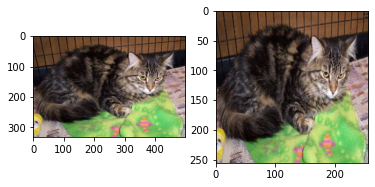

In [3]:
image_1 = cv2.imread('/content/drive/MyDrive/dataset/CAT AND DOG/training_set-20230215T051132Z-001/training_set/cats/cat.1005.jpg',1)
plt.subplot(1,2,1)
plt.imshow(image_1[:,:,::-1])

print(image_1.shape)

# resiuizing the image
image_resize = cv2.resize(image_1,((256,256)))

print(image_resize.shape)
plt.subplot(1,2,2)
plt.imshow(image_resize[:,:,::-1])

In [4]:
# setting same size of an image

img_height,img_width = [256,256]



In [5]:
# finding the data
path = '/content/drive/MyDrive/dataset'


In [6]:
# finding training path and testing path
train_data_path = '/content/drive/MyDrive/dataset/CAT AND DOG/training_set-20230215T051132Z-001/training_set'
test_data_path = '/content/drive/MyDrive/dataset/CAT AND DOG/test_set-20230208T043352Z-001/test_set'

In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# data preprocessing

training_preprocess = ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         zoom_range = 0.2,
                                         horizontal_flip =True,
                                         vertical_flip = True)
# nothing willl be add3ed for the test

testing_preprocess = ImageDataGenerator(rescale = 1./255)

In [9]:
# finding the label folder
# using glob we can find the number of label folders in training_dataset folder 

import glob
from glob import glob

In [10]:
glob('/content/drive/MyDrive/dataset/CAT AND DOG/training_set-20230215T051132Z-001')
glob('/content/drive/MyDrive/dataset/CAT AND DOG/test_set-20230208T043352Z-001')

['/content/drive/MyDrive/dataset/CAT AND DOG/test_set-20230208T043352Z-001']

In [11]:
target = ['cats','dogs']

In [12]:
# collecting each image from training label folder and testing label folder 

train_data = training_preprocess.flow_from_directory(train_data_path,
                                                     target_size = (img_height,img_width),
                                                     classes = target,
                                                     class_mode = 'binary',
                                                     batch_size = 32)
test_data = testing_preprocess.flow_from_directory(test_data_path,
                                                   target_size = (img_height,img_width),
                                                   classes = target,
                                                   class_mode = 'binary',
                                                   batch_size = 32)

Found 8035 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [13]:
# its time to build cnn model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Activation,Dense
from tensorflow.keras.activations import relu,sigmoid,softmax
from tensorflow.keras.optimizers import Adam

In [14]:
model = Sequential()

# First hidden layer in CNN
model.add(Conv2D(128 , kernel_size = (3,3),padding='same',activation='relu',input_shape = (img_height,img_width,3)))
model.add(MaxPool2D(pool_size = (2,2)))

# second hidden layer in CNN 
model.add(Conv2D(64 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Third hidden layer in CNN 
model.add(Conv2D(32 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Fourth hidden layer in CNN 
model.add(Conv2D(16 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Fifth hidden layer in CNN 
model.add(Conv2D(8 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Sixth hidden layer in CNN 
model.add(Conv2D(4 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())  # converting into 1-d and giving 1-d to ANN 

model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

In [16]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['Accuracy'])

In [17]:
model.fit(train_data,epochs = 2)


Epoch 1/2
252/252 [==============================] - 2383s 9s/step - loss: 0.6931 - Accuracy: 0.5080
Epoch 2/2
252/252 [==============================] - 146s 580ms/step - loss: 0.6934 - Accuracy: 0.4976


In [18]:
model.history.history.keys()

dict_keys(['loss', 'Accuracy'])

In [19]:
training_loss = model.history.history['loss']

In [20]:
training_loss

[0.6931079030036926, 0.6934353709220886]

In [21]:
training_acc = model.history.history['Accuracy']

In [22]:
training_acc

[0.5080273747444153, 0.4975731074810028]

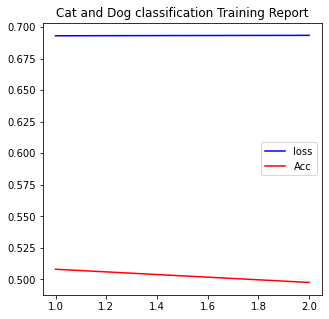

In [23]:
plt.figure(figsize = (5,5))
plt.title('Cat and Dog classification Training Report')
plt.plot(np.arange(1,3) , training_loss , color = 'b',label = 'loss')
plt.plot(np.arange(1,3) , training_acc , color = 'r',label = 'Acc')
plt.legend(loc = 0)
plt.show()

In [24]:
# actual dependent values will be consuderd as 
test_data.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [25]:
y_test_pred = model.predict(test_data)

64/64 [==============================] - 1095s 17s/step


In [26]:
y_test_pred

array([[0.5072964 ],
       [0.50700617],
       [0.50659835],
       ...,
       [0.50680834],
       [0.50941354],
       [0.5081523 ]], dtype=float32)

In [27]:
# converting probability values into 0 and 1 class for checking performance report 
c = []
for i in y_test_pred:
  for j in i:
    if j > 0.5:
      c.append(1)
    else:
      c.append(0)

In [28]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix

In [29]:
# Accuracy 

accuracy_score(test_data.classes , c)

0.5002471576866041

In [30]:
confusion_matrix(test_data.classes , c)

array([[   0, 1011],
       [   0, 1012]])

In [31]:
print(classification_report(test_data.classes , c))
     

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1011
           1       0.50      1.00      0.67      1012

    accuracy                           0.50      2023
   macro avg       0.25      0.50      0.33      2023
weighted avg       0.25      0.50      0.33      2023



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
